In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
%config Completer.use_jedi = False

In [93]:
def get_fitness_df(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_time_df(df):
    fitness_col = [col for col in df if col.startswith('time')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_fevals_df(df):
    fitness_col = [col for col in df if col.startswith('fevals')]
    df_fitness = df[fitness_col]
    return df_fitness

def plot_fitness(df_fitness, names={}, title="", save_as=None):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
        
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

def plot_time(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Time") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["time_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_fevals(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Function Evals") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fevals_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def combine_csv(problem, names={}):
    # read first file so we can get indexes
    _first_file_name = list(names.keys())[0]
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ _first_file_name +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in names.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

In [94]:
def plot_max_fitness_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fitness_" + name]
        fevals_to_max_fitness = row["fevals_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, "max_fitness=",max_fitness_value, "iterations=",max_fitness_index, "fevals=",fevals_to_max_fitness)
        
    
    if plot:
        plt.title(title)
        plt.ylabel("Fitness Score")
        plt.ylabel("Algorithm") 
        plt.bar(x_labels, y_values)
        plt.show()
    
    if save_as:
        plt.savefig('images/'+save_as)


In [95]:
def plot_max_time_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_time_value = row["time_" + name]
        
        x_labels.append(label)
        y_values.append(max_time_value)
        
        print(label, max_time_value)
        
    if plot:
        plt.title(title)
        plt.ylabel("Time (Seconds)")
        plt.ylabel("Algorithm") 
        bars = plt.bar(x_labels, y_values)
    
        # Set bar color
        for bar in bars:
            bar.set_color('green')
            
        plt.show()
        
    if save_as:
        plt.savefig('images/'+save_as)

# Tune MIMIC

## Picking Sample size

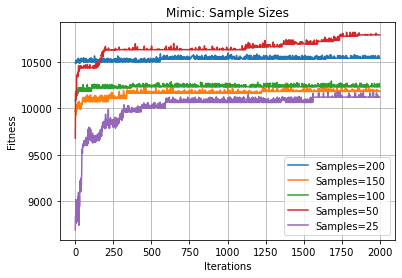

In [117]:
files = {
#     "exp00-MIMIC-15"    : "Samples=100",
#     "exp00-MIMIC-19"    : "Samples=50",
#     "exp00-MIMIC-22"    : "Samples=10",
#     "exp00-MIMIC-2"    : "Samples=500",
    "exp00-MIMIC-6"    : "Samples=200",
    "exp00-MIMIC-10"    : "Samples=150",
     "exp00-MIMIC-14"    : "Samples=100",
    "exp00-MIMIC-18"    : "Samples=50",
    "exp00-MIMIC-19"    : "Samples=25",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="Mimic: Sample Sizes", save_as="ks/001")

## Picking Keep size (Sample set to 50)

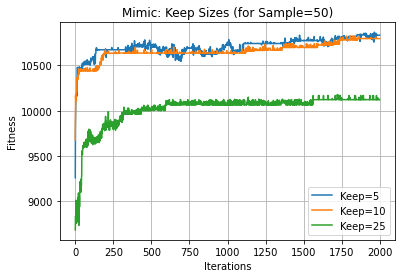

In [121]:
files = {
    "exp00-MIMIC-17"    : "Keep=5",
    "exp00-MIMIC-18"    : "Keep=10",
     "exp00-MIMIC-19"   : "Keep=25",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="Mimic: Keep Sizes (for Sample=50)", save_as="ks/002")

In [169]:
# files = {
#     "exp00-MIMIC-0"    : "0",
#     "exp00-MIMIC-1"    : "1",
#     "exp00-MIMIC-2"    : "2",
#     "exp00-MIMIC-3"    : "3",
#     "exp00-MIMIC-4"    : "4",
#     "exp00-MIMIC-5"    : "5",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:10000], files, title="something")

In [170]:
# files = {
#     "exp00-MIMIC-6"    : "6",
#     "exp00-MIMIC-7"    : "7",
#     "exp00-MIMIC-8"    : "8",
#     "exp00-MIMIC-9"    : "9",
#     "exp00-MIMIC-10"    : "10",
#     "exp00-MIMIC-11"    : "11",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:10000], files, title="something")

In [171]:
# files = {
#     "exp00-MIMIC-12"    : "12",
#     "exp00-MIMIC-13"    : "13",
#     "exp00-MIMIC-14"    : "14",
#     "exp00-MIMIC-15"    : "15",
#     "exp00-MIMIC-16"    : "16",
#     "exp00-MIMIC-17"    : "17",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:10000], files, title="something")

In [172]:
# files = {
#     "exp00-MIMIC-18"    : "18",
#     "exp00-MIMIC-19"    : "19",
#     "exp00-MIMIC-20"    : "20",
#     "exp00-MIMIC-21"    : "21",
#     "exp00-MIMIC-22"    : "22",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:10000], files, title="something")

# Best Mimic Params

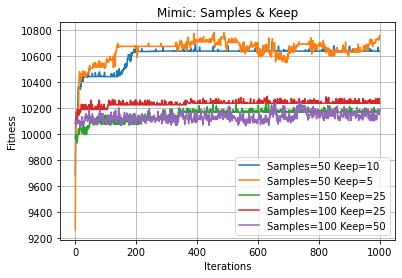

In [123]:
files = {
    "exp00-MIMIC-18"    : "Samples=50 Keep=10",
    "exp00-MIMIC-17"    : "Samples=50 Keep=5",
    "exp00-MIMIC-10"    : "Samples=150 Keep=25",
    "exp00-MIMIC-14"    : "Samples=100 Keep=25",
    "exp00-MIMIC-15"    : "Samples=100 Keep=50",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="Mimic: Samples & Keep", save_as="ks/01")

# Tune RHC

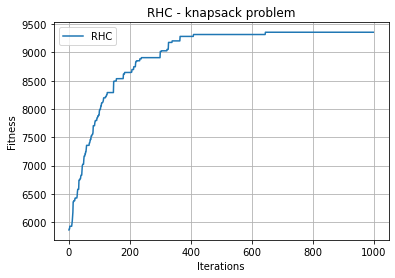

In [106]:
files = {
    "exp01-RHC-1"    : "RHC",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="RHC - knapsack problem", save_as="ks/02")

# Tune SA

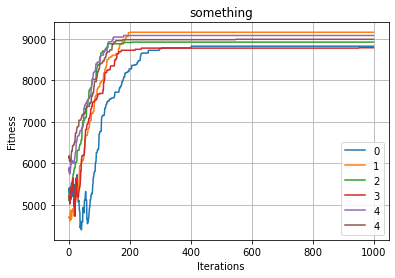

In [174]:
files = {
    "exp02-SA-0"    : "0",
    "exp02-SA-1"    : "1",
    "exp02-SA-2"    : "2",
    
    "exp02-SA-3"    : "3",
    "exp02-SA-4"    : "4",
    "exp02-SA-5"    : "4",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="something")

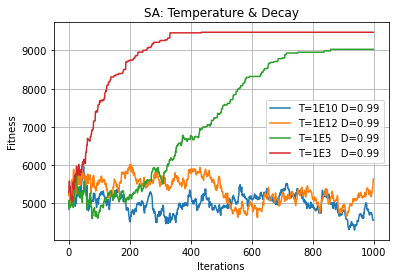

In [136]:
files = {
    "exp02-SA-9"    : "T=1E10 D=0.99",
    "exp02-SA-12"   : "T=1E12 D=0.99",
    "exp02-SA-10"   : "T=1E5   D=0.99",
    "exp02-SA-11"   : "T=1E3   D=0.99",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="SA: Temperature & Decay", save_as="ks/03")

In [175]:
# files = {
#     "exp02-SA-2"    : "1E3, .95",
#     "exp02-SA-10"    : "1E5, .99",
#     "exp02-SA-11"    : "1E3, .99",
    
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:1000], files, title="something")

# Tune GA

In [176]:
# files = {
#     "exp03-GA-0"    : "0",
#     "exp03-GA-1"    : "1",
#     "exp03-GA-2"    : "2",
#     "exp03-GA-3"    : "3",
#     "exp03-GA-4"    : "4",
#     "exp03-GA-5"    : "5",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:20000], files, title="something")

In [177]:
# files = {
#     "exp03-GA-6"    : "6",
#     "exp03-GA-7"    : "7",
#     "exp03-GA-71"    : "71",
#     "exp03-GA-72"    : "72",
#     "exp03-GA-73"    : "73",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:20000], files, title="something")

In [178]:
# files = {
#     "exp03-GA-8"    : "8",
#     "exp03-GA-9"    : "9",
#     "exp03-GA-10"    : "10",
# }

# df_test = combine_csv("knapsack", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:20000], files, title="something")

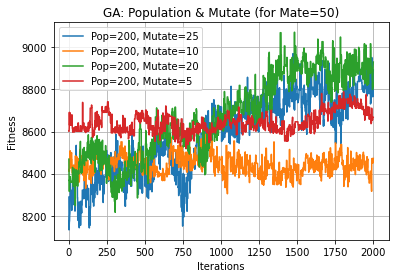

In [148]:
files = {
    "exp03-GA-4"    : "Pop=200, Mutate=25",
    "exp03-GA-5"    : "Pop=200, Mutate=10",
    "exp03-GA-55"   : "Pop=200, Mutate=20",
    "exp03-GA-6"    : "Pop=200, Mutate=5",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:2000], files, title="GA: Population & Mutate (for Mate=50)", save_as="ks/04")

# N=100

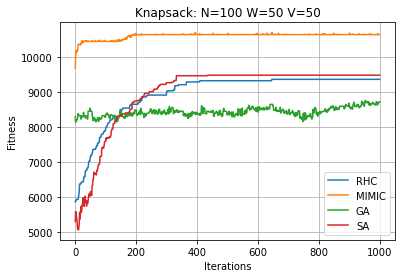

In [166]:
files = {
    "exp01-RHC-1"    : "RHC",
    "exp00-MIMIC-18" : "MIMIC",
    "exp03-GA-4"     : "GA",
    "exp02-SA-11"    : "SA",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:1000], files, title="Knapsack: N=100 W=50 V=50", save_as="ks/05")

In [167]:
plot_max_fitness_bar(df_test[:1000], files, title="Best Fitness", plot=False)

RHC max_fitness= 9357.726611630796 iterations= 645 fevals= 914.0
MIMIC max_fitness= 10703.164826444194 iterations= 646 fevals= 79750.0
GA max_fitness= 8751.345341608623 iterations= 951 fevals= 98155.0
SA max_fitness= 9476.650174998846 iterations= 435 fevals= 794.0


In [168]:
plot_max_time_bar(df_test[:1000], files, title="Wallclock time", plot=False)

RHC 0.07899999618530272
MIMIC 9.460000038146973
GA 1.2620000839233398
SA 0.009999990463256836


# Small Problem Size (N=50)

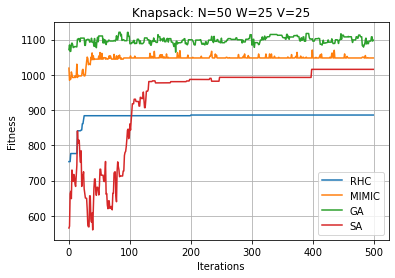

In [163]:
files = {
    "exp04-RHC-0"    : "RHC",
    "exp04-MIMIC-0" : "MIMIC",
    "exp04-GA-0"    : "GA",
    "exp04-SA-0"    : "SA",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:500], files, title="Knapsack: N=50 W=25 V=25", save_as="ks/06")

In [164]:
plot_max_fitness_bar(df_test[:500], files, title="Best Fitness", plot=False)

RHC max_fitness= 885.7466675718957 iterations= 200 fevals= 406.0
MIMIC max_fitness= 1070.2277766416528 iterations= 399 fevals= 52800.0
GA max_fitness= 1120.610873040995 iterations= 82 fevals= 39365.0
SA max_fitness= 1015.3358220792985 iterations= 398 fevals= 760.0


In [165]:
plot_max_time_bar(df_test[:500], files, title="Wallclock time", plot=False)

RHC 0.023000001907348636
MIMIC 1.568000078201294
GA 0.187000036239624
SA 0.013000011444091795


# Small Problem Size (N=200)

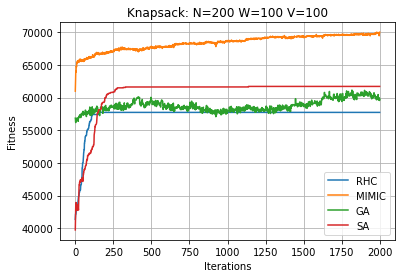

In [160]:
files = {
    "exp05-RHC-0"    : "RHC",
    "exp05-MIMIC-0" : "MIMIC",
    "exp05-GA-0"    : "GA",
    "exp05-SA-0"    : "SA",
}

df_test = combine_csv("knapsack", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:2000], files, title="Knapsack: N=200 W=100 V=100", save_as="ks/07")

In [161]:
plot_max_fitness_bar(df_test[:2000], files, title="Best Fitness", plot=False)

RHC max_fitness= 57731.94113379726 iterations= 154 fevals= 368.0
MIMIC max_fitness= 69989.50373356759 iterations= 1999 fevals= 224300.0
GA max_fitness= 61143.622675287275 iterations= 1817 fevals= 156542.0
SA max_fitness= 61704.640096181574 iterations= 1138 fevals= 1486.0


In [162]:
plot_max_time_bar(df_test[:2000], files, title="Wallclock time", plot=False)

RHC 0.011999845504760742
MIMIC 83.76400017738342
GA 0.8589999675750732
SA 0.03800010681152344
